# Imports

In [1]:
import numpy as np
import pkg_resources

/var/folders/67/h3lnn6nn2wj20jvk2xsx5tnm0000gn/T/ipykernel_28364/3925343478.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
from run_6body_encounter import run_6_body_simulation
from gif_plotting import visualize_frames
from gif_plotting import visualize_initial_final_frames

# Examples of 6 body evolution (3 binaries)

## No encounter

In [3]:
# Initial conditions

sep= [30, 20, 50] #AU
ecc = [0.0, 0.0, 0]
v_coms = [[0, 0, 0.], [1., 1., 0.], [-1., -1.5, 1.] ] # km/s
directions = [0.4, -0.6, 1.2]
orbit_plane = [ [0,0,1], [0,0,1], [0,0,1] ]  # normal vectors defining orbital planes of the three binaries
impact_parameter = [0.0, 0.0]  # AU
distance = [-100, 100]  # AU

# Example run call
no_collision, _, _ = run_6_body_simulation(
    sep,
    ecc,
    directions,
    v_coms,
    orbit_plane,
    impact_parameter,
    distance,
    masses=None,
    centers=None,
    age=None,
    run_label="Test_No_Collision", 
)

init_params = {
    'sep': sep,
    'ecc': ecc,
    'directions': directions,
    'v_coms': v_coms,
    'orbit_plane': orbit_plane,
    'impact_parameter': impact_parameter,
    'distance': distance
}



Starting simulation
Most massive star: Mass = 47.57 MSun, Velocity = 24.96 km/s
Final outcome of the system: ('no_collision', 'No collision — all stars survived with their original masses.')


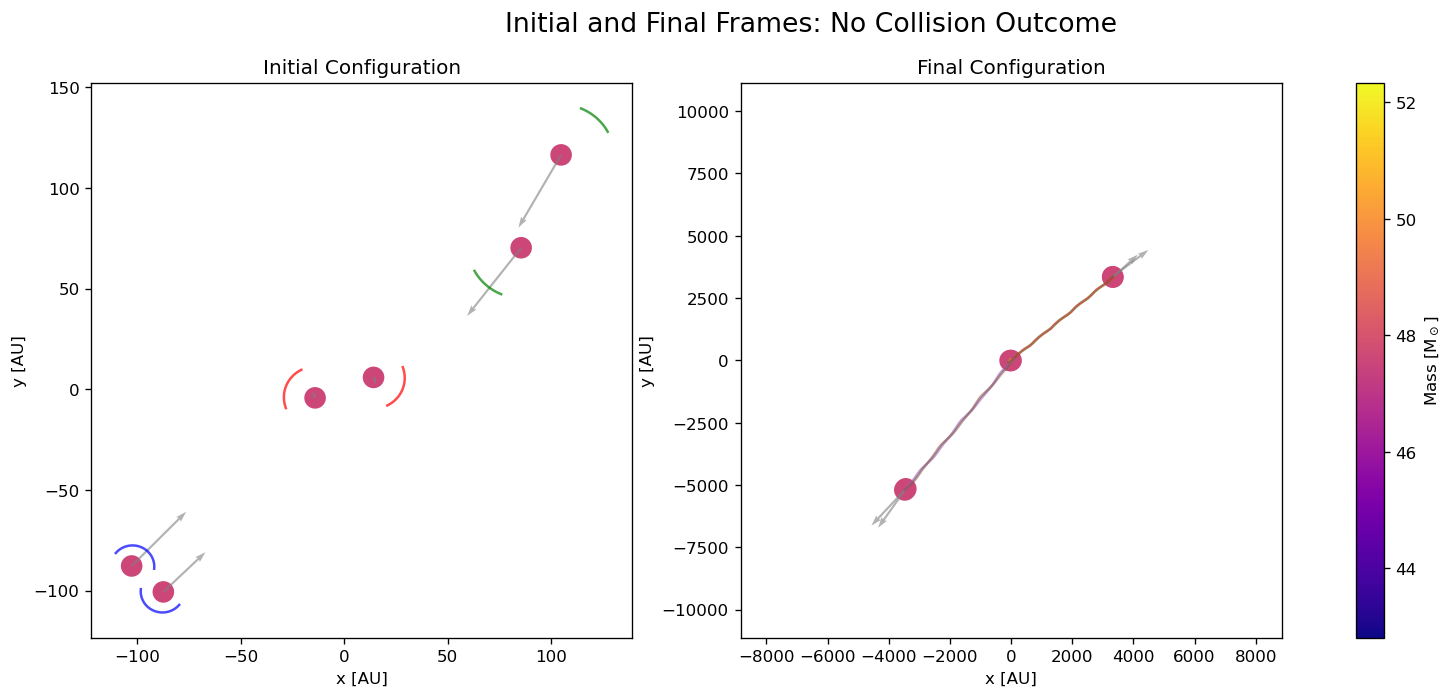

In [4]:
visualize_initial_final_frames(no_collision, init_params=init_params,collision = 0, label="No Collision Outcome")

In [ ]:
#visualize_frames(no_collision, "No collision")

## Creative collision - Bound outcome

In [6]:

# Tight inner binary
sep = [0.15, 1.0, 1.0]      # AU
ecc = [0.98, 0.3, 0.2]      # high eccentricity inner binary

# Very slow incoming COM velocities (~5% of v_crit)
v_coms = [
    [0.0, 0.0, 0.0],
    [0.05, 0.0, 0.0],
    [ 0.04, 0.0, 0.0],
]

# Orbital orientations
directions = [0.0, 0.0, 0.0]

# Coplanar orbits
orbit_plane = [[0,0,1]]*3

# Head-on collision
impact_parameter = [0.0, 0.0]

# Extremely compact initial positions
distance = [-1, 1]           # AU

creative_collision_bound, _, _ = run_6_body_simulation(
    sep, ecc, directions, v_coms,
    orbit_plane, impact_parameter, distance,
    masses=None, centers=None, age=None,
    run_label="Creative Collision - Bound"
)


# --- Store for later visualization ---
init_params = {
    'sep': sep,
    'ecc': ecc,
    'directions': directions,
    'v_coms': v_coms,
    'orbit_plane': orbit_plane,
    'impact_parameter': impact_parameter,
    'distance': distance
}



Starting simulation
Collision detected at 6.1 yr between 2 and 4
Fi collision done: {'Initial Mass': quantity<95.1388958302 MSun>, 'Rscale': quantity<0.162977376329 au>, 'N': 1000}
Collision 0 processed: remnant = 94.76 M☉, R = 13.39 R☉
Most massive star: Mass = 94.76 MSun, Velocity = 379.78 km/s
Final outcome of the system: Creative collision — bound system formed with remnant of 94.8 M☉.


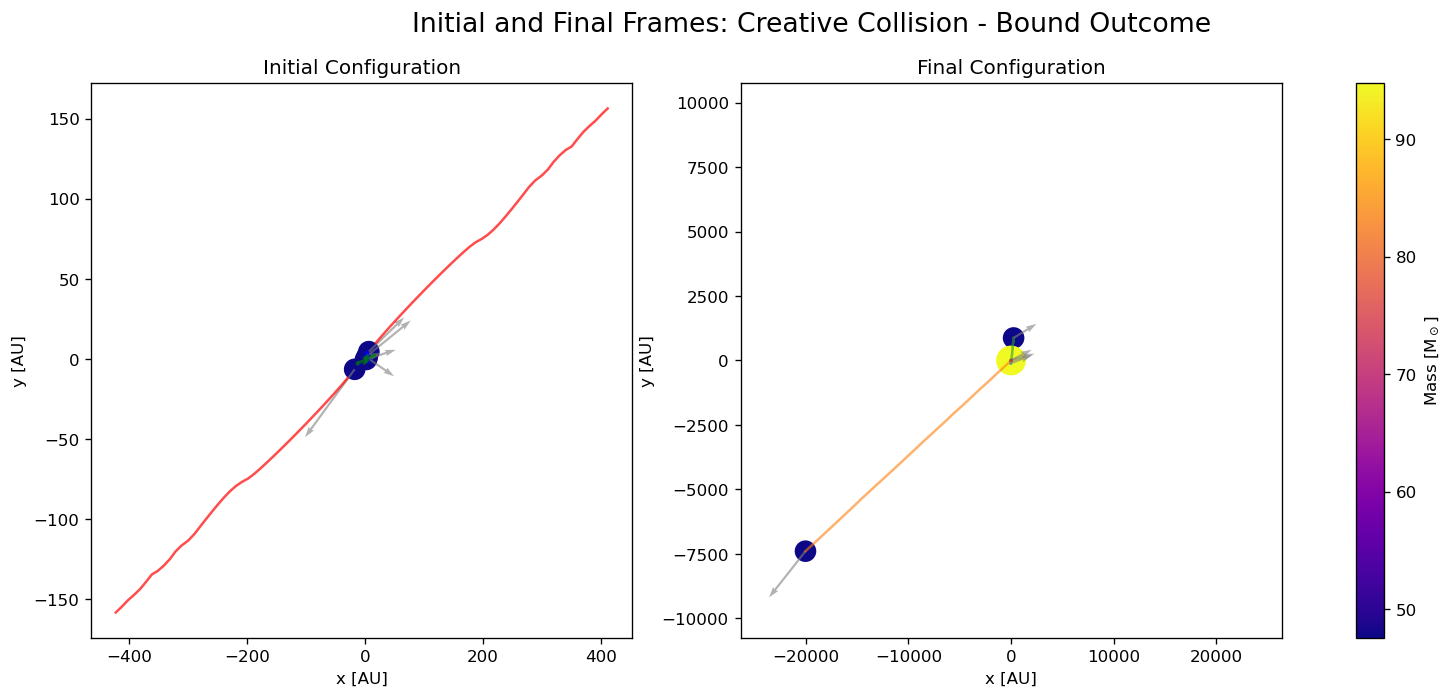

In [7]:
visualize_initial_final_frames(creative_collision_bound, init_params=init_params,collision = 0 , label="Creative Collision - Bound Outcome")

In [8]:
#visualize_frames(creative_collision_bound, "Creative Collision - Bound")

## Destructive collision

In [9]:

# Tight inner binary
sep = [0.15, 1.0, 1.0]      # AU
ecc = [0.98, 0.3, 0.2]      # high eccentricity inner binary

# Very slow incoming COM velocities (~5% of v_crit)
v_coms = [
    [0.0, 0.0, 0.0],
    [0.05, 0.0, 0.0],
    [ 0.04, 0.0, 0.0],
]

# Orbital orientations
directions = [0.0, 0.5, -0.5]

# Coplanar orbits
orbit_plane = [[0,0,1]]*3

# Head-on collision
impact_parameter = [0.0, 0.0]

# Extremely compact initial positions
distance = [-1, 1]           # AU

destructive_collision, _, _ = run_6_body_simulation(
    sep, ecc, directions, v_coms,
    orbit_plane, impact_parameter, distance,
    masses=None, centers=None, age=None,
    run_label="Destructive Collision"
)


# --- Store for later visualization ---
init_params = {
    'sep': sep,
    'ecc': ecc,
    'directions': directions,
    'v_coms': v_coms,
    'orbit_plane': orbit_plane,
    'impact_parameter': impact_parameter,
    'distance': distance
}


Starting simulation
Collision detected at 1.8 yr between 2 and 5
Fi collision done: {'Initial Mass': quantity<95.1388958302 MSun>, 'Rscale': quantity<0.137754896652 au>, 'N': 1000}
⚠️ Very small remnant mass; treating as destructive collision
Destructive collision: terminating simulation at t = 1.8 yr.


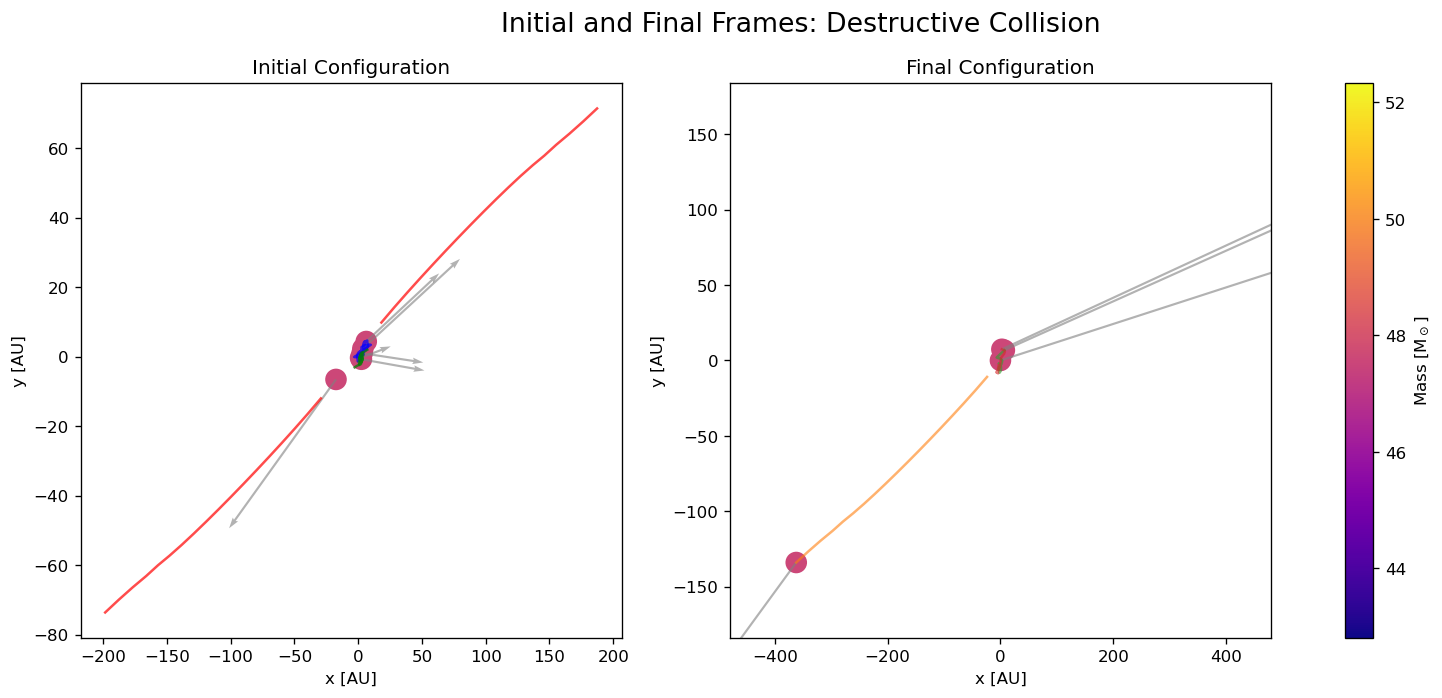

In [10]:
visualize_initial_final_frames(destructive_collision, init_params=init_params,collision = 0 , label="Destructive Collision")

In [ ]:
#visualize_frames(destructive_collision, "Destructive Collision")

# Cross sections

In [1]:
from cross_section import sequential_top_creative_collision
top_trials = sequential_top_creative_collision(
    N_trials=100,   # number of simulations to run
    N_best=5,       # number of top creative collisions to keep
    N_binaries=3,
    distance=50.0
)




/Users/eirinichrysovergi/miniforge3/lib/python3.12/site-packages/amuse/support/options.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Simulation 1/100... Starting simulation
Most massive star: Mass = 47.57 MSun, Velocity = 11.31 km/s
Final outcome of the system: ('no_collision', 'No collision — all stars survived with their original masses.')
Most massive star velocity: 11.31 km/s, outcome: no_collision
Simulation 2/100... Starting simulation
Most massive star: Mass = 47.57 MSun, Velocity = 189.48 km/s
Final outcome of the system: ('no_collision', 'No collision — all stars survived with their original masses.')
Simulation 3/100... Starting simulation
Most massive star: Mass = 47.57 MSun, Velocity = 63.60 km/s
Final outcome of the system: ('no_collision', 'No collision — all stars survived with their original masses.')
Simulation 4/100... Starting simulation
Most massive star: Mass = 47.57 MSun, Velocity = 220.43 km/s
Final outcome of the system: ('no_collision', 'No collision — all stars survived with their original masses.')
Simulation 5/100... Starting simulation
Most massive star: Mass = 47.57 MSun, Velocity = 100

In [2]:
for i, t in enumerate(top_trials):
    print(f"Top {i+1}: outcome={t['label']}, max_velocity={t['max_velocity']}")
